In [6]:
import pandas as pd
import numpy as np
import sqlite3
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 60
plt.rcParams['figure.figsize'] = (10,5)

# Путь к файлу CSV
csv_path = r"D:\DS 2025\dz_3\weather.csv"   

df = pd.read_csv(csv_path, sep=",", encoding="utf-8-sig") 

print("Размер данных:", df.shape)
df.head(5)

Размер данных: (297627, 28)


C:\Users\user\AppData\Local\Temp\ipykernel_17072\1459286561.py:14: DtypeWarning: Columns (9,10,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, sep=",", encoding="utf-8-sig")


,datetime,station_ru,station_en,lat_lon,temperature,pressure_station,pressure_sea_level,humidity,wind_direction_ru,wind_direction_en,wind_direction_short,wind_speed,cloud_cover_ru,cloud_cover_short,weather_event_ru,weather_event_en,clouds_cl_ru,lowest_clouds_height,clouds_cm_ru,clouds_cm_en,clouds_cl_en,clouds_ch_ru,clouds_ch_en,visibility,dewpoint_temperature,rainfall,rainfall_time,snow_cover_depth
0,01.04.2023 21:00,Барановичи,Baranovichi,"53.116680,26.000139",9.4,732.9,750.1,93.0,"Ветер, дующий с юга",Wind blowing from the south,S,3.0,100%.,100,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",600-1000,NaN,NaN,Stratocumulus other than Stratocumulus cumulog...,NaN,NaN,10.0,8.3,NaN,NaN,NaN
1,01.04.2023 18:00,Барановичи,Baranovichi,"53.116680,26.000139",10.7,731.7,748.8,87.0,"Ветер, дующий с юго-востока",Wind blowing from the south-east,SE,2.0,"90 или более, но не 100%",90-99,Дымка,Mist,"Слоисто-кучевые, образовавшиеся не из кучевых.",300-600,"Высококучевые просвечивающие, расположенные на...",Altocumulus translucidus at a single level.,Stratocumulus other than Stratocumulus cumulog...,"Перистых, перисто-кучевых или перисто-слоистых...","No Cirrus, Cirrocumulus or Cirrostratus.",8.0,8.6,NaN,NaN,NaN
2,01.04.2023 15:00,Барановичи,Baranovichi,"53.116680,26.000139",9.6,731.7,748.9,89.0,"Штиль, безветрие","Calm, no wind","Calm, no wind",0.0,100%.,100,Дымка,Mist,Слоистые туманообразные или слоистые разорванн...,300-600,NaN,NaN,Stratus nebulosus or Stratus fractus other tha...,NaN,NaN,8.0,7.9,NaN,NaN,NaN
3,01.04.2023 12:00,Барановичи,Baranovichi,"53.116680,26.000139",8.4,731.5,748.7,94.0,"Ветер, дующий с юга",Wind blowing from the south,S,1.0,100%.,100,Дымка,Mist,Слоистые туманообразные или слоистые разорванн...,300-600,NaN,NaN,Stratus nebulosus or Stratus fractus other tha...,NaN,NaN,8.0,7.5,NaN,NaN,NaN
4,01.04.2023 09:00,Барановичи,Baranovichi,"53.116680,26.000139",6.2,731.1,748.5,98.0,"Ветер, дующий с юга",Wind blowing from the south,S,1.0,100%.,100,Дымка,Mist,Слоистые туманообразные или слоистые разорванн...,100-200,NaN,NaN,Stratus nebulosus or Stratus fractus other tha...,NaN,NaN,3.5,5.9,3.0,12.0,NaN


In [7]:
df["datetime"] = pd.to_datetime(df["datetime"], format="%d.%m.%Y %H:%M", errors="coerce")

# Числовые колонки
numeric_cols = [
    "temperature", "pressure_station", "pressure_sea_level",
    "humidity", "wind_speed", "visibility",
    "dewpoint_temperature", "rainfall", "snow_cover_depth"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print(df.dtypes.head(15))

datetime                datetime64[ns]
station_ru                      object
station_en                      object
lat_lon                         object
temperature                    float64
pressure_station               float64
pressure_sea_level             float64
humidity                       float64
wind_direction_ru               object
wind_direction_en               object
wind_direction_short            object
wind_speed                     float64
cloud_cover_ru                  object
cloud_cover_short               object
weather_event_ru                object
dtype: object


In [8]:

import sqlite3
from sqlalchemy import create_engine

engine = create_engine("sqlite:///D:/DS 2025/dz_3/weather.db")

df.to_sql("weather", con=engine, if_exists="replace", index=False)

print("✅ Таблица 'weather' успешно сохранена в базе weather.db")

with engine.connect() as conn:
    sample = pd.read_sql("SELECT * FROM weather LIMIT 5;", conn)

print(sample.to_string())


✅ Таблица 'weather' успешно сохранена в базе weather.db
                     datetime  station_ru   station_en              lat_lon  temperature  pressure_station  pressure_sea_level  humidity            wind_direction_ru                 wind_direction_en wind_direction_short  wind_speed             cloud_cover_ru cloud_cover_short weather_event_ru weather_event_en                                                                                                    clouds_cl_ru lowest_clouds_height                                                  clouds_cm_ru                                 clouds_cm_en                                                              clouds_cl_en                                         clouds_ch_ru                              clouds_ch_en  visibility  dewpoint_temperature  rainfall  rainfall_time snow_cover_depth
0  2023-04-01 21:00:00.000000  Барановичи  Baranovichi  53.116680,26.000139          9.4             732.9               750.1      93.0          В

In [9]:
import os
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, text
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

db_path = r"D:/DS 2025/dz_3/weather.db"   
assert os.path.exists(db_path), f"DB не найдена по пути {db_path}"

engine = create_engine(f"sqlite:///{db_path}", connect_args={"check_same_thread": False})

with engine.connect() as conn:
    tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Таблицы в БД:")
display(tables)

with engine.connect() as conn:
    if 'weather' in tables['name'].tolist():
        sample = pd.read_sql_query("SELECT * FROM weather LIMIT 5;", conn)
        print("Пример строк из weather:")
        display(sample)
    else:
        print("Таблица 'weather' не найдена.")


Таблицы в БД:


,name
0,weather


Пример строк из weather:


,datetime,station_ru,station_en,lat_lon,temperature,pressure_station,pressure_sea_level,humidity,wind_direction_ru,wind_direction_en,wind_direction_short,wind_speed,cloud_cover_ru,cloud_cover_short,weather_event_ru,weather_event_en,clouds_cl_ru,lowest_clouds_height,clouds_cm_ru,clouds_cm_en,clouds_cl_en,clouds_ch_ru,clouds_ch_en,visibility,dewpoint_temperature,rainfall,rainfall_time,snow_cover_depth
0,2023-04-01 21:00:00.000000,Барановичи,Baranovichi,"53.116680,26.000139",9.4,732.9,750.1,93.0,"Ветер, дующий с юга",Wind blowing from the south,S,3.0,100%.,100,None,None,"Слоисто-кучевые, образовавшиеся не из кучевых.",600-1000,None,None,Stratocumulus other than Stratocumulus cumulog...,None,None,10.0,8.3,NaN,NaN,None
1,2023-04-01 18:00:00.000000,Барановичи,Baranovichi,"53.116680,26.000139",10.7,731.7,748.8,87.0,"Ветер, дующий с юго-востока",Wind blowing from the south-east,SE,2.0,"90 или более, но не 100%",90-99,Дымка,Mist,"Слоисто-кучевые, образовавшиеся не из кучевых.",300-600,"Высококучевые просвечивающие, расположенные на...",Altocumulus translucidus at a single level.,Stratocumulus other than Stratocumulus cumulog...,"Перистых, перисто-кучевых или перисто-слоистых...","No Cirrus, Cirrocumulus or Cirrostratus.",8.0,8.6,NaN,NaN,None
2,2023-04-01 15:00:00.000000,Барановичи,Baranovichi,"53.116680,26.000139",9.6,731.7,748.9,89.0,"Штиль, безветрие","Calm, no wind","Calm, no wind",0.0,100%.,100,Дымка,Mist,Слоистые туманообразные или слоистые разорванн...,300-600,None,None,Stratus nebulosus or Stratus fractus other tha...,None,None,8.0,7.9,NaN,NaN,None
3,2023-04-01 12:00:00.000000,Барановичи,Baranovichi,"53.116680,26.000139",8.4,731.5,748.7,94.0,"Ветер, дующий с юга",Wind blowing from the south,S,1.0,100%.,100,Дымка,Mist,Слоистые туманообразные или слоистые разорванн...,300-600,None,None,Stratus nebulosus or Stratus fractus other tha...,None,None,8.0,7.5,NaN,NaN,None
4,2023-04-01 09:00:00.000000,Барановичи,Baranovichi,"53.116680,26.000139",6.2,731.1,748.5,98.0,"Ветер, дующий с юга",Wind blowing from the south,S,1.0,100%.,100,Дымка,Mist,Слоистые туманообразные или слоистые разорванн...,100-200,None,None,Stratus nebulosus or Stratus fractus other tha...,None,None,3.5,5.9,3.0,12.0,None


In [10]:
with engine.connect() as conn:
    conn.execute(text("PRAGMA foreign_keys = ON;"))

create_sql = """
DROP TABLE IF EXISTS observations_new;
DROP TABLE IF EXISTS stations;

CREATE TABLE stations (
    station_id INTEGER PRIMARY KEY AUTOINCREMENT,
    station_en TEXT UNIQUE,
    station_ru TEXT,
    lat REAL,
    lon REAL,
    lat_lon TEXT
);

CREATE TABLE observations_new (
    obs_id INTEGER PRIMARY KEY AUTOINCREMENT,
    station_id INTEGER,
    observation_dt TEXT,      -- ISO string 'YYYY-MM-DD HH:MM:SS'
    temperature REAL,
    pressure_station REAL,
    pressure_sea_level REAL,
    humidity REAL,
    wind_direction_ru TEXT,
    wind_direction_en TEXT,
    wind_direction_short TEXT,
    wind_speed REAL,
    cloud_cover_ru TEXT,
    cloud_cover_short TEXT,
    weather_event_ru TEXT,
    weather_event_en TEXT,
    lowest_clouds_height TEXT,
    clouds_cl_ru TEXT,
    clouds_cl_en TEXT,
    clouds_cm_ru TEXT,
    clouds_cm_en TEXT,
    clouds_ch_ru TEXT,
    clouds_ch_en TEXT,
    visibility REAL,
    dewpoint_temperature REAL,
    rainfall REAL,
    rainfall_time TEXT,
    snow_cover_depth REAL,
    FOREIGN KEY (station_id) REFERENCES stations(station_id)
);
"""
with engine.connect() as conn:
    for stmt in create_sql.strip().split(';'):
        s = stmt.strip()
        if s:
            conn.execute(text(s))
    conn.commit()

print("Созданы таблицы stations и observations_new.")


Созданы таблицы stations и observations_new.


In [11]:

with engine.connect() as conn:
    stations_df = pd.read_sql_query("""
        SELECT DISTINCT station_en, station_ru, lat_lon
        FROM weather
        WHERE station_en IS NOT NULL
    """, conn)

def parse_latlon(s):
    try:
        if s is None: return (None, None)
        s2 = str(s).replace('"','').strip()
        parts = s2.split(',', 1)
        if len(parts) == 2:
            return float(parts[0]), float(parts[1])
        return (float(parts[0]), None)
    except:
        return (None, None)

stations_df[['lat','lon']] = stations_df['lat_lon'].apply(lambda x: pd.Series(parse_latlon(x)))
stations_df = stations_df[['station_en','station_ru','lat','lon','lat_lon']]

with engine.connect() as conn:
    stations_df.to_sql('stations', conn, if_exists='append', index=False)

print("Записано станций:", len(stations_df))

with engine.connect() as conn:
    insert_sql = """
    INSERT INTO observations_new (
        station_id, observation_dt, temperature, pressure_station, pressure_sea_level, humidity,
        wind_direction_ru, wind_direction_en, wind_direction_short, wind_speed,
        cloud_cover_ru, cloud_cover_short, weather_event_ru, weather_event_en,
        lowest_clouds_height, clouds_cl_ru, clouds_cl_en, clouds_cm_ru, clouds_cm_en,
        clouds_ch_ru, clouds_ch_en, visibility, dewpoint_temperature, rainfall, rainfall_time, snow_cover_depth
    )
    SELECT s.station_id,
           -- приводим datetime к ISO-формату (если в weather хранится как '2023-04-01 21:00:00.000000', оставим как есть)
           datetime, temperature, pressure_station, pressure_sea_level, humidity,
           wind_direction_ru, wind_direction_en, wind_direction_short, wind_speed,
           cloud_cover_ru, cloud_cover_short, weather_event_ru, weather_event_en,
           lowest_clouds_height, clouds_cl_ru, clouds_cl_en, clouds_cm_ru, clouds_cm_en,
           clouds_ch_ru, clouds_ch_en, visibility, dewpoint_temperature, rainfall, rainfall_time, snow_cover_depth
    FROM weather w
    LEFT JOIN stations s ON w.station_en = s.station_en;
    """
    conn.execute(text(insert_sql))
    conn.commit()

with engine.connect() as conn:
    cnt = pd.read_sql_query("SELECT COUNT(*) AS cnt FROM observations_new;", conn).iloc[0,0]
print("Записей в observations_new:", cnt)


Записано станций: 7
Записей в observations_new: 297627


In [12]:
with engine.connect() as conn:
    conn.execute(text("CREATE INDEX IF NOT EXISTS idx_obs_dt ON observations_new(observation_dt);"))
    conn.execute(text("CREATE INDEX IF NOT EXISTS idx_obs_stationid ON observations_new(station_id);"))
    conn.commit()

with engine.connect() as conn:
    print("Пример объединённых записей (observation + station name):")
    q = """
    SELECT o.observation_dt, st.station_en, st.station_ru, o.temperature, o.humidity
    FROM observations_new o
    JOIN stations st ON o.station_id = st.station_id
    LIMIT 5;
    """
    print(pd.read_sql_query(q, conn).to_string())


Пример объединённых записей (observation + station name):
               observation_dt   station_en  station_ru  temperature  humidity
0  2023-04-01 21:00:00.000000  Baranovichi  Барановичи          9.4      93.0
1  2023-04-01 18:00:00.000000  Baranovichi  Барановичи         10.7      87.0
2  2023-04-01 15:00:00.000000  Baranovichi  Барановичи          9.6      89.0
3  2023-04-01 12:00:00.000000  Baranovichi  Барановичи          8.4      94.0
4  2023-04-01 09:00:00.000000  Baranovichi  Барановичи          6.2      98.0


In [13]:
with engine.connect() as conn:
    # 1) Наблюдения для конкретной станции за дату
    q1 = """
    SELECT o.observation_dt, st.station_en, o.temperature, o.humidity
    FROM observations_new o
    JOIN stations st ON o.station_id = st.station_id
    WHERE st.station_en = 'Baranovichi' AND date(o.observation_dt) = '2023-04-01'
    ORDER BY o.observation_dt;
    """
    res1 = pd.read_sql_query(q1, conn)
    display(res1.head())

    # 2) Наблюдения с температурой ниже 0°C и влажностью > 80%
    q2 = """
    SELECT o.observation_dt, st.station_en, o.temperature, o.humidity
    FROM observations_new o
    JOIN stations st ON o.station_id = st.station_id
    WHERE o.temperature < 0 AND o.humidity > 80
    ORDER BY o.observation_dt DESC
    LIMIT 50;
    """
    display(pd.read_sql_query(q2, conn).head())

    # 3) Наблюдения с сильным ветром (>15 m/s)
    q3 = """
    SELECT o.observation_dt, st.station_en, o.wind_speed
    FROM observations_new o
    JOIN stations st ON o.station_id = st.station_id
    WHERE o.wind_speed > 15
    ORDER BY o.wind_speed DESC
    LIMIT 50;
    """
    display(pd.read_sql_query(q3, conn).head())


,observation_dt,station_en,temperature,humidity
0,2023-04-01 00:00:00.000000,Baranovichi,5.7,99.0
1,2023-04-01 03:00:00.000000,Baranovichi,5.6,97.0
2,2023-04-01 06:00:00.000000,Baranovichi,5.0,98.0
3,2023-04-01 09:00:00.000000,Baranovichi,6.2,98.0
4,2023-04-01 12:00:00.000000,Baranovichi,8.4,94.0


,observation_dt,station_en,temperature,humidity
0,2023-03-31 06:00:00.000000,Gomel,-2.1,88.0
1,2023-03-31 03:00:00.000000,"Minsk, Uruchye",-2.6,95.0
2,2023-03-31 03:00:00.000000,Mogilev,-3.0,88.0
3,2023-03-31 03:00:00.000000,Gomel,-1.4,89.0
4,2023-03-31 00:00:00.000000,"Minsk, Uruchye",-1.6,92.0


,observation_dt,station_en,wind_speed
0,2017-06-17 15:00:00.000000,Mogilev,52.0
1,2017-06-17 18:00:00.000000,Mogilev,51.0
2,2006-04-04 03:00:00.000000,"Vitebsk, airport",46.0
3,2007-12-05 03:00:00.000000,Baranovichi,26.0
4,2006-08-27 12:00:00.000000,Baranovichi,20.0


In [14]:
with engine.connect() as conn:
    # 1) AVG/MIN/MAX температуры по станциям (топ-10 по среднему)
    q_avg = """
    SELECT st.station_en, COUNT(o.obs_id) AS obs_count,
           ROUND(AVG(o.temperature),2) AS avg_temp,
           MIN(o.temperature) AS min_temp, MAX(o.temperature) AS max_temp
    FROM observations_new o
    JOIN stations st ON o.station_id = st.station_id
    WHERE o.temperature IS NOT NULL
    GROUP BY st.station_en
    HAVING obs_count >= 50
    ORDER BY avg_temp DESC
    LIMIT 10;
    """
    avg_table = pd.read_sql_query(q_avg, conn)
    display(avg_table)

    # 2) Сумма осадков по станции за апрель 2023
    q_rain = """
    SELECT st.station_en,
           ROUND(SUM(o.rainfall),2) AS total_rain_mm
    FROM observations_new o
    JOIN stations st ON o.station_id = st.station_id
    WHERE o.rainfall IS NOT NULL
      AND strftime('%Y-%m', o.observation_dt) = '2023-04'
    GROUP BY st.station_en
    ORDER BY total_rain_mm DESC
    LIMIT 10;
    """
    display(pd.read_sql_query(q_rain, conn))

    # 3) COUNT: число наблюдений по направлению ветра
    q_count_wind = """
    SELECT o.wind_direction_short, COUNT(*) AS cnt
    FROM observations_new o
    GROUP BY o.wind_direction_short
    ORDER BY cnt DESC
    LIMIT 20;
    """
    display(pd.read_sql_query(q_count_wind, conn))


,station_en,obs_count,avg_temp,min_temp,max_temp
0,"Brest, airport",62657,9.37,-22.0,36.0
1,Gomel,52877,8.43,-28.6,38.2
2,Baranovichi,52877,7.94,-27.9,34.3
3,"Minsk, Uruchye",52875,7.52,-28.6,35.4
4,Mogilev,17985,7.40,-25.7,35.9
5,"Vitebsk, airport",52889,7.16,-30.6,37.4
6,"Grodno, Shchuchyn",5357,7.05,-27.8,28.8


,station_en,total_rain_mm
0,"Vitebsk, airport",6.00
1,Mogilev,4.90
2,"Minsk, Uruchye",4.10
3,Baranovichi,3.00
4,Gomel,1.72
5,"Grodno, Shchuchyn",0.60


,wind_direction_short,cnt
0,None,62947
1,"Calm, no wind",28407
2,S,21459
3,SW,19563
4,W,18459
5,WNW,14600
6,WSW,14177
7,SE,14140
8,NW,13414
9,SSW,13035


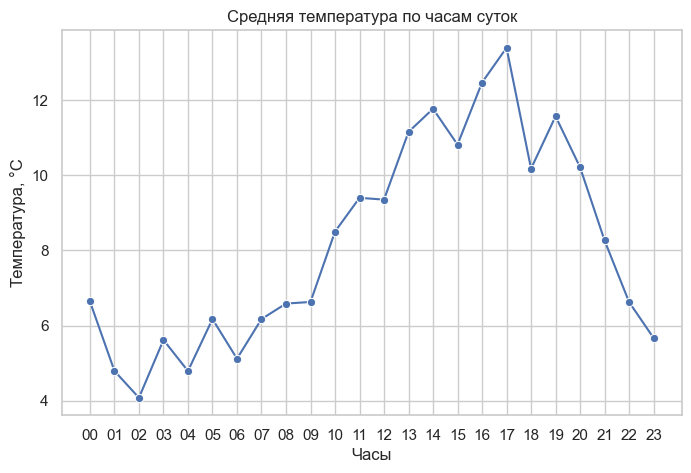

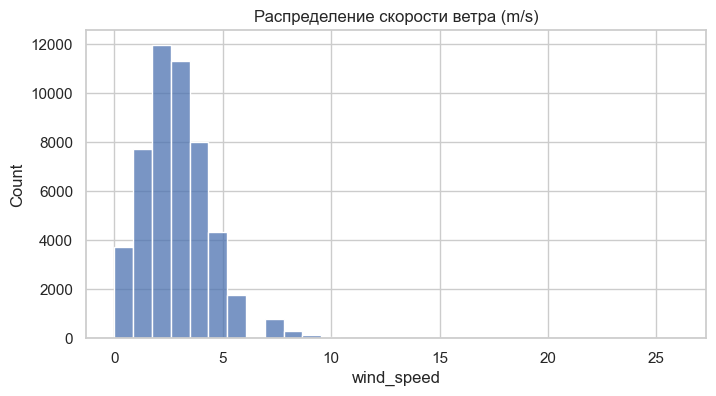

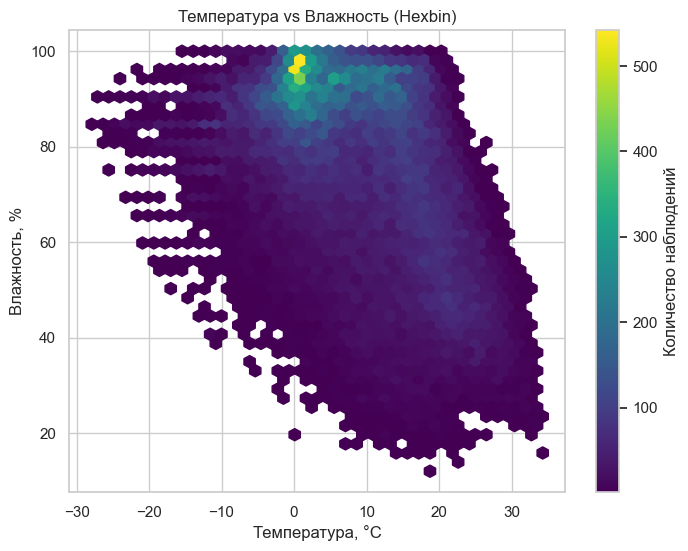

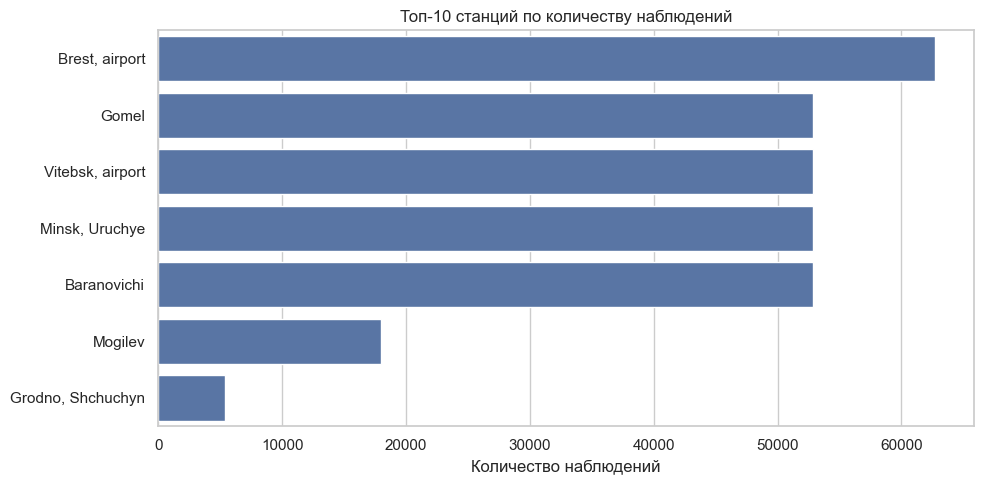

In [19]:
import matplotlib.dates as mdates

with engine.connect() as conn:
    # средняя температура по часам суток 
    q = """
    SELECT strftime('%H', observation_dt) AS hour,
           AVG(temperature) AS avg_temp
    FROM observations_new
    WHERE temperature IS NOT NULL
    GROUP BY hour
    ORDER BY hour
    """
    temp_hour = pd.read_sql_query(q, conn)

plt.figure(figsize=(8,5))
sns.lineplot(x='hour', y='avg_temp', data=temp_hour, marker="o")
plt.title("Средняя температура по часам суток")
plt.xlabel("Часы")
plt.ylabel("Температура, °C")
plt.show()

with engine.connect() as conn:
    # Гистограмма скорости ветра (подвыборка)
    q_w = "SELECT wind_speed FROM observations_new WHERE wind_speed IS NOT NULL LIMIT 50000;"
    wind = pd.read_sql_query(q_w, conn)
plt.figure(figsize=(8,4))
sns.histplot(wind['wind_speed'], bins=30)
plt.title('Распределение скорости ветра (m/s)')
plt.show()

 # Hexbin с температурой и влажностью
with engine.connect() as conn:
    q = """
    SELECT temperature, humidity
    FROM observations_new
    WHERE temperature IS NOT NULL AND humidity IS NOT NULL
    LIMIT 50000
    """
    temp_hum = pd.read_sql_query(q, conn)

plt.figure(figsize=(8,6))
plt.hexbin(temp_hum['temperature'], temp_hum['humidity'],
           gridsize=40, cmap="viridis", mincnt=1)
plt.colorbar(label="Количество наблюдений")
plt.xlabel("Температура, °C")
plt.ylabel("Влажность, %")
plt.title("Температура vs Влажность (Hexbin)")
plt.show()

with engine.connect() as conn:
    # Бар-чарт: топ станций по наблюдениям
    q_top = "SELECT s.station_en, COUNT(o.obs_id) as cnt FROM observations_new o JOIN stations s ON o.station_id=s.station_id GROUP BY s.station_en ORDER BY cnt DESC LIMIT 10;"
    top = pd.read_sql_query(q_top, conn)
plt.figure(figsize=(10,5))
sns.barplot(x='cnt', y='station_en', data=top)
plt.title('Топ-10 станций по количеству наблюдений')
plt.xlabel('Количество наблюдений')
plt.ylabel('')
plt.tight_layout()
plt.show()


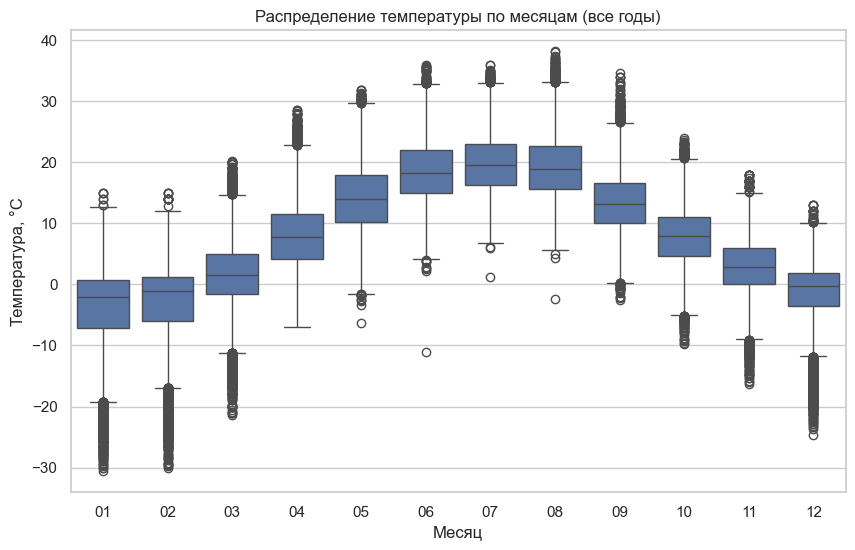

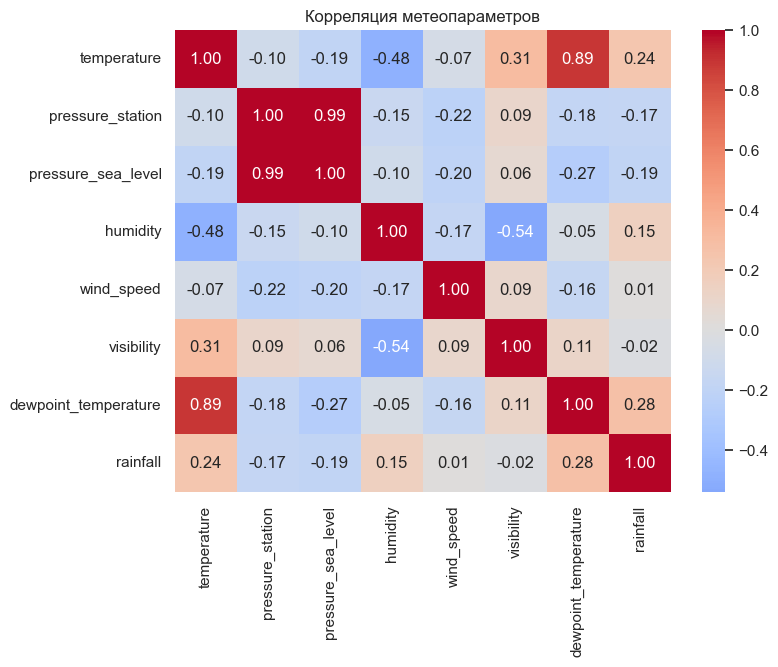

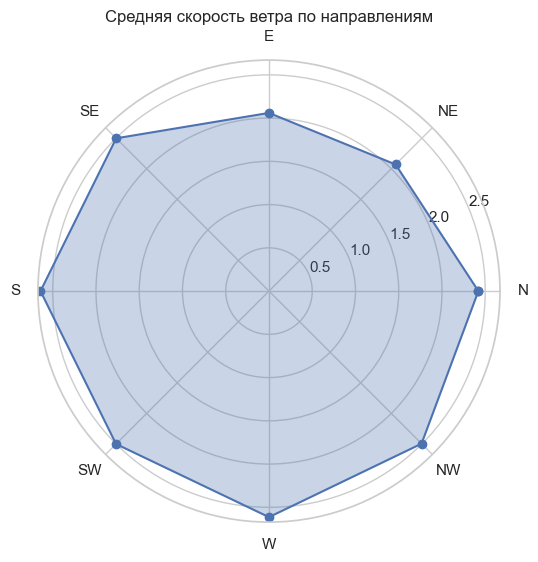

In [17]:
# Температура по месяцам
with engine.connect() as conn:
    q = """
    SELECT strftime('%m', observation_dt) AS month,
           temperature
    FROM observations_new
    WHERE temperature IS NOT NULL
    """
    temp_month = pd.read_sql_query(q, conn)

plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='temperature', data=temp_month,
            order=[f"{i:02d}" for i in range(1,13)])  
plt.title("Распределение температуры по месяцам (все годы)")
plt.xlabel("Месяц")
plt.ylabel("Температура, °C")
plt.show()

# Корреляция между параметрами
with engine.connect() as conn:
    q = """
    SELECT temperature, pressure_station, pressure_sea_level, humidity,
           wind_speed, visibility, dewpoint_temperature, rainfall
    FROM observations_new
    WHERE temperature IS NOT NULL
    LIMIT 50000;
    """
    corr_df = pd.read_sql_query(q, conn)

plt.figure(figsize=(8,6))
sns.heatmap(corr_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Корреляция метеопараметров")
plt.show()

# Роза ветров

with engine.connect() as conn:
    q = """
    SELECT wind_direction_short, wind_speed
    FROM observations_new
    WHERE wind_direction_short IS NOT NULL
    """
    wind_df = pd.read_sql_query(q, conn)

wind_counts = wind_df.groupby("wind_direction_short")["wind_speed"].mean().reindex(
    ['N','NE','E','SE','S','SW','W','NW']
)

angles = np.linspace(0, 2*np.pi, len(wind_counts), endpoint=False).tolist()
values = wind_counts.values.tolist() + [wind_counts.values[0]]
angles += [angles[0]]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, marker="o")
ax.fill(angles, values, alpha=0.3)
ax.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
ax.set_xticklabels(wind_counts.index)
plt.title("Средняя скорость ветра по направлениям")
plt.show()
